# 2022 Kenyan General Elections Through Tweets

## An NLP project-approach

Kenya, an East African country, will be conducting a general elections this year- August 9th, 2022. This mini project aims to understand the Kenyan people sentiments on elections-related topics with the goal of getting an insight in which presidential candidate is highly favoured and likely to clinch victory.

Summary on Kenya Demographic:
https://dhsprogram.com/pubs/pdf/OD71/OD71.pdf


Data is acquired from Twitter, a social platform that has gained popularit by masses in Kenya (.. and globally), by web-scrapping using `Twint library`.
    

- Data (Tweets) limit set to `5 million tweets`. 
    
##### Scrapping Library Choice Summary: 
- Twint has unlimited scrapping capability unlike proprietary Twitter API `Tweepy` that requires API request and developer account. Tweepy API limit scrapping to only 3200 tweets.

- In this mini project, I will utelize Twint scrapping tool.

In [1]:
# Import twint API
import twint

# asynchronous runtime import (allows run untill complete before returning results)
import nest_asyncio
nest_asyncio.apply()

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import json
import string

# NLP imports
from nltk import (sent_tokenize, word_tokenize)
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

from wordcloud import WordCloud

# Set default plt size
plt.rcParams['figure.figsize'] = (13.0, 9.0)

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime import
import datetime


In [2]:
# Configure object


def get_kenya_elections_tweets(use_cache = True):
    
    raw_tweets =  'kenyan_2022_elections_sentiments_immediate_post_elections.csv'
    
    if os.path.exists(raw_tweets) and use_cache:
        
        print('Reading local csv file..')
        
        return pd.read_csv(raw_tweets)
    else: 
        current_date = datetime.datetime.now()
        current_end_date = current_date + datetime.timedelta(days=1)
        
        config = twint.Config()
        config.Search = ["kenya elections 2022"] 
        config.Lang = "en"
        config.Limit = 100_000_000
        config.Store_csv = True
        config.Output = raw_tweets
        print('Running search...')
        twint.run.Search(config)
        
        config.Since = current_date.strftime("%Y-%m-%d")
        config.Until = current_end_date.strftime("%Y-%m-%d")
        current_date = current_end_date
        current_end_date += datetime.timedelta(days=1)
        return pd.read_csv(raw_tweets)

### Read Tweets

In [3]:
# Get tweets and save in csv format
tweets = get_kenya_elections_tweets()

Running search...
1557170150083903488 2022-08-09 20:01:09 -0500 <Steve50675991> If Ruto think his day was bad, tell him to remember this happy little dog who thought this parade was just for him.😂😂😂😂 #BabaThe5th  #UnfoldYourWorldKE #kenyaelections2022 Igathe Citizen TV Odingaism #KenyaDecides Itumbi Mombasa Nyeri Baba IEBC Sakaja Babu Owino Mt Kenya  https://t.co/btmrv9iofr
1557169927194288128 2022-08-09 20:00:16 -0500 <aheartforafrica> #Kenya #Elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/Yh0kxu7QfC
1557169201869365248 2022-08-09 19:57:23 -0500 <nd1ema002> @TheStarBreaking 🤣🤣🤣🤣🤣🤣🤣🤣 Good riddance to rubbish
1557168305236226048 2022-08-09 19:53:49 -0500 <nd1ema002> Moses Kuria ameoshwa kuoshwa pale Kiambu🤣🤣🤣🤣. Kiambu voters have told him to take his diarrhoea mouth to Sugoi.
1557167725981868033 2022-08-09 19:51:31 -0500 <Steve50675991> He might start having stopovers  claiming all those donations he made during campaigns..Please Ruto dont make a

1557140820046000128 2022-08-09 18:04:36 -0500 <Maggie_Kenya1> Tomorrow morning Jalango explaining to the KISS FM Board why he left.😂😂😂😂😂 #kenyaelections2022 #KenyaElections  https://t.co/AWS2RDcGvl
1557139661549539329 2022-08-09 18:00:00 -0500 <ACLEDINFO> NEW ANALYSIS | #Kenya’s Political Violence Landscape in the Lead-Up to the 2022 Elections  https://t.co/5bLo9XIZu6
1557139619866607619 2022-08-09 17:59:50 -0500 <BeingCharlie> Kenya's moment of TRUTH Raila Amolo Odinga Engineer vs William Kipchirchir Samoei Arap Ruto PhD  #AzimioTuesday #KenyaElections #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557139486252883971 2022-08-09 17:59:18 -0500 <daizykui> CONGRATULATIONS @SakajaJohnson My GOVERNOR #KenyaDecides #KenyasChoice2022 #KenyaElections #KenyansDecides2022 #kenyaelections2022
1557139120522231809 2022-08-09 17:57:51 -0500 <_Sasken> Looks like the Mount Kenya region is UDA's stronghold in the 2022 elections.
1557139057846767616 202

1557130627450904577 2022-08-09 17:24:06 -0500 <MapopaK> Honoured to have been part of the Joint AU-COMESA Observer Mission to the 2022 Kenya elections.  I was deployed in the awesome counties of Nakuru and Laikipia. Witnessed amazing moments! Took time to see Lake Naivasha and The Panari Resort Nyahururu,  places of fond memories!
1557130501286240258 2022-08-09 17:23:36 -0500 <BeingCharlie> Kenya's moment of TRUTH  #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557130381127720960 2022-08-09 17:23:07 -0500 <BeingCharlie> Kenya's moment of TRUTH #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557130166912024586 2022-08-09 17:22:16 -0500 <BeingCharlie> Kenya's moment of TRUTH  Kibra decides #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557129683392757761 2022-08-09 17:20:21 -0500 <BeingCharlie> Kenya's moment of TRUTH  #KenyaDecides2022 #Ken

1557118901380587521 2022-08-09 16:37:30 -0500 <BeingCharlie> Kenya's moment of TRUTH   #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557118773827698688 2022-08-09 16:37:00 -0500 <BeingCharlie> Kenya's moment of TRUTH  Taveta decides #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557118756010315778 2022-08-09 16:36:55 -0500 <af_rank> TUBAI WINS NATOK SENATOR   #KenyaDecides2022 #KenyaElections #KenyaYaamua2022 #kenyaelections2022  #JustVoted
1557118635075928065 2022-08-09 16:36:27 -0500 <BeingCharlie> Good riddance Kenya's moment of TRUTH  Kiambu decides  #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557118413427937280 2022-08-09 16:35:34 -0500 <BeingCharlie> Kenya's moment of TRUTH #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557118169847832576 2022-08-09 16:34:36 -0500 <miss_muthama> 

1557106552397611008 2022-08-09 15:48:26 -0500 <SanKibz> Homabay county  Kidero 243,654  Wanga 78,000 #kenyaelections2022 #KenyaElections
1557106330963529728 2022-08-09 15:47:33 -0500 <SosGachuhi> If I look at you like this, please be informed I have no opinion views at all. #KenyansDecides2022 #KenyaElections #kenyaelections2022 #KenyaChoice2022 #KOT  https://t.co/ms23JC3ayo
1557106145554305025 2022-08-09 15:46:49 -0500 <EzekielLubale1> Kenya 2022 general elections  result #KenyaDecides2022
1557105829287022592 2022-08-09 15:45:33 -0500 <LoneyMulei> Tight Race between Wajackoyah the 5th na spoilt Votes 🗳 uweh 🤣🤣🤣  #KenyaDecides2022 #KenyaElections #KenyansDecides2022 #Kenya #kenyaelections2022 #ElectionsKE #Elections2022
1557105298166452225 2022-08-09 15:43:27 -0500 <NPSusa> Kenya elections 2022: Kenyans cast ballot in a race too close to call  https://t.co/Bahz43rjyl /  @CNNPolitics
1557104429207257092 2022-08-09 15:40:00 -0500 <NMkapikoh> There are a lot of information disorders aroun

1557091680523894785 2022-08-09 14:49:20 -0500 <FEscrutinio> #Kenia 🇰🇪 - Los primeros cómputos dan una ventaja diminuta a Raila Odinga.  🔵Odinga (centroizquierda) = 49,34% 🟡Ruto (centroderecha) = 49,30%  #KenyaDecides2022 #kenyaelections2022 #Kenya
1557091593936592900 2022-08-09 14:49:00 -0500 <JustRoy7_> Naona hapo IEBC results wajackoya anapata results mbili mbili kama zile makende mbili ya fisi alikuwa anasema. #KenyaDecides2022 #kenyaelections2022 #kenyanspolls
1557091207263780865 2022-08-09 14:47:27 -0500 <MrGaani> #kenyaelections2022 I wish Kenyan’s a peaceful election.
1557090816899817473 2022-08-09 14:45:54 -0500 <Gobannimo> Watching #kenyaelections2022 In Berbera with some passionate Kenyan citizens in #Somaliland. All #somalilanders are packing @RailaOdinga but we want our brothers and sisters in #Kenya to have peaceful elections regardless, there choice of leader.  #KenyaDecides2022  https://t.co/KLAgVgiWWw
1557090708036747266 2022-08-09 14:45:28 -0500 <justinmakangara> #inaw

1557072999039344640 2022-08-09 13:35:06 -0500 <BeingCharlie> Kenya's moment of TRUTH  Uasin Gishu decides #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557072793849794560 2022-08-09 13:34:17 -0500 <BeingCharlie> @NationBreaking Full TIME Criminal and part time legislator, Kimilili MP Didmus Barasa doing his thing  #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1557072456984281089 2022-08-09 13:32:57 -0500 <cryptonait> I'm still Kenyan even if I didn't vote  Y'all at @StateHouseKenya and @iebc keep people like me poor so 🤷🏾‍♀️ Game Set Match  #KenyaElections2022 #TheFeministChurch  #QueeringTheBallot  https://t.co/ZYSPDJ60T1
1557072451875520514 2022-08-09 13:32:56 -0500 <newsfet777> Kenya Elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/CSetZJvM2M
1557072330882523136 2022-08-09 13:32:27 -0500 <ZBaadaa> #kenyaelections2022 👇  https://t.co/NhehJv3Gf8
1

1557057525966839809 2022-08-09 12:33:37 -0500 <nd1ema002> Nyeri Town   Raila Amolo Odinga 103  William Ruto 273  #KenyaDecides2022  https://t.co/HDkhjMBa0j
1557057486552801280 2022-08-09 12:33:28 -0500 <AFRICA24TV> Le vote de ce 9 août 2022, est un test pour la démocratie au #Kenya. Des élections générales ont été organisées avec pour point d'encre l’alternance à la tête du pays, alors que le président actuel Uhuru Kenyatta n’est pas candidat à sa propre succession.   https://t.co/v8PcIuNUK0
1557057442265157637 2022-08-09 12:33:17 -0500 <DESCOLONIZADORA> neanderthals at #KenyaElections making sure their #DEPOPULATION agenda remains top priority in #Africa   their recessive genes are threatened by the original dominant DNA  #KenyaDecides2022   #kenyaelections2022 #KENYA   #Agenda2030 #NewWorldOrder  https://t.co/eaMnpzKDlG
1557057293027532800 2022-08-09 12:32:42 -0500 <jichotvkenya> 2022 GENERAL ELECTIONS IEBC Commissioner Francis Wanderi: IEBC has resolved to hold a byelection in eight

1557036321264357376 2022-08-09 11:09:21 -0500 <esumehwinner1> Kenya Elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/6AWmGjD6Gm
1557035515135856646 2022-08-09 11:06:09 -0500 <leakblast> Kenya Elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/hMgpAiBqHc
1557034922220867585 2022-08-09 11:03:48 -0500 <nd1ema002> Kapseret kwa @HonOscarSudi   Raila Amollo Odinga 233  Wiliam Ruto 78  #KenyaDecides2022  https://t.co/j7NM1YcoxR
1557033212693839874 2022-08-09 10:57:00 -0500 <nd1ema002> Baringo  Raila 51  Ruto 3  https://t.co/KxbQPdkL2m
1557033115872280577 2022-08-09 10:56:37 -0500 <thisislagos1> Kenya Elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/VD1GjohU8u
1557032799814787074 2022-08-09 10:55:22 -0500 <gatimu_charles> @OleItumbi Walisema wemetanganga. Leo Kitaeleweka. #kenyaelections2022 #KenyasChoice2022 #KenyaDecides Mt Kenya
1557032780198215681 2022-08-09 10:55:17 -0500 <nd

1557023395358949385 2022-08-09 10:18:00 -0500 <EbruTVKenya> Following ballot mix-ups, elections for governor seats in Mombasa and Kakamega will be held on August 23, 2022, as will Kitui Rural, Kacheliba, Pokot South, and Rongai in Nakuru county. #KenyaDecides2022  https://t.co/z77wpSCXUy
1557023280044859392 2022-08-09 10:17:32 -0500 <HarryGodfirst> Uchaguzi wa #kenyaelections2022 mmesikia yale Mambo wayapendayo CCM ya KUPITA BILA KUPINGWA?Ni wa kumbushe tu hapa Tz🇹🇿2020 UCHAFUZI MKUU yalikuwepo miongoni ni; -W/Mkuu Kassim Majaliwa. -Job Ndugai-a pyscopath of course. -Babu Tale. -Ridhiwani Kikwete -Nape...The list goes on
1557023175745101825 2022-08-09 10:17:07 -0500 <MaikaraMogusu> Raila takes the  early lead.  STOP THE COUNT!!! Raila the 5th #KenyaDecides  #kenyaelections2022  #Kenyaelection  https://t.co/9QalIzHvUr
1557022917669576704 2022-08-09 10:16:06 -0500 <minnajune> Friends can be friends even with different political stands. Don't be a @johnlegend if I am a @kanyewest  #KenyaD

1557010920588644352 2022-08-09 09:28:25 -0500 <Shaddy_Kenya> This time elections results will be announced within 24hr of voting. Low voter turnout! #KenyaDecides #KenyasChoice2022  #kenyaelections2022
1557010823310356483 2022-08-09 09:28:02 -0500 <NaijaNews> Kenya Elections 2022: Odinga And Ruto In Tight Presidential Race  https://t.co/0IhRMpCpQV via @NaijaNews #NaijaNews
1557010737582997510 2022-08-09 09:27:42 -0500 <NaijaNews> Kenya Elections 2022: Odinga And Ruto In Tight Presidential Race  https://t.co/IwUaLM12an
1557010716892471297 2022-08-09 09:27:37 -0500 <NaijaNewsCEO> Kenya Elections 2022: Odinga And Ruto In Tight Presidential Race  https://t.co/7n9mz7c8KB
1557010698735321095 2022-08-09 09:27:33 -0500 <kingkelvinson> Kenya Elections 2022: Odinga And Ruto In Tight Presidential Race  https://t.co/Zfid4B4LK7
1557010681354125312 2022-08-09 09:27:28 -0500 <Opeedo> Kenya Elections 2022: Odinga And Ruto In Tight Presidential Race  https://t.co/n2hLXRd5He
1557010663620636673 2022-08-

1556996767820009474 2022-08-09 08:32:11 -0500 <safariwithselle> #kenyaElections2022  https://t.co/IBUg6r5h8D
1556995769265160194 2022-08-09 08:28:13 -0500 <Mues_Mo> I hope #wsr #williamruto wins...I did my part sasa arinde kula ...tusherehekee #kenyaelections2022 @ Nalepo Country Bar  https://t.co/koivvZLh9U
1556995552398786560 2022-08-09 08:27:21 -0500 <RadioDalsan1> UPDATE: IEBC has postponed  elections in #Eldas constituency of #Wajir County after gunfight erupted in the eve of the polls.   #KenyaElections2022  https://t.co/Rczcb1GDBe
1556995241302966273 2022-08-09 08:26:07 -0500 <SKavuli> Ee Mungu nguvu yetu Ilete baraka kwetu Haki iwe ngao na mlinzi Natukae na undugu Amani na Uhuru Raha tupate na ustawi🙏 #kenyanationalanthem #kenyaelections2022  #tuesdayvibe  #AmaniKenya2022  #peacefulElections #TrendingNow  #Peace  #love  #unity🇰🇪  https://t.co/NjFCjCDRU1
1556995169089724417 2022-08-09 08:25:50 -0500 <RadioDalsan1> UPDATE:  Concerns over a low turn out in the Kenya General electi

1556979024588640257 2022-08-09 07:21:41 -0500 <DerekJohnBryant> BBC News - Kenya elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/Cl9gUzCOeF
1556978728995110914 2022-08-09 07:20:30 -0500 <BeingCharlie> Disgraceful acts of VIOLENCE  #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1556978352799461376 2022-08-09 07:19:01 -0500 <rogerjgmlp> "Kenya 2022 General Elections"    https://t.co/wMYJ4UZSA0
1556978047601049600 2022-08-09 07:17:48 -0500 <BeingCharlie> @paulakahumbu Wildlife Champion Kenya's CHOICE  #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1556977890998292486 2022-08-09 07:17:11 -0500 <BeingCharlie> 👏🏿👏🏿👏🏿👏🏿👏🏿👏🏿🇰🇪 #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1556977041592967169 2022-08-09 07:13:48 -0500 <BeingCharlie> Mombasa  #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenya

1556958725814079489 2022-08-09 06:01:01 -0500 <BeingCharlie> 🙆🏿‍♂️ #KenyaDecides2022 #KenyasChoice2022 #KenyaDecides #KenyansPoll #kenyaelections2022 #Kivumbi2022
1556958617848672257 2022-08-09 06:00:36 -0500 <EconomyPortals> Kenya Elections 2022: Raila Odinga And William Ruto In A Tight Race For President  Continue:  https://t.co/iX9dn3tqoa - - - #kenya #elections #election #vote #politics #democracy #voting #todaysnews #news #dailynews #latestnews #dailyupdates #economyportals  https://t.co/08tIfDBEb6
1556958549888143363 2022-08-09 06:00:19 -0500 <OmondiIsaiah6> "Everything we stand for is at stake in this election." #KenyaElections2022 #RailaTheEnigma #IEBC #MyPresident #WhatWeStandFor  https://t.co/X6BD7pZzwt
1556958501330722816 2022-08-09 06:00:08 -0500 <africauptodate> Kenya General Elections 2022 Begin. Read more  https://t.co/3t5cpamogh
1556958299899166720 2022-08-09 05:59:20 -0500 <BeingCharlie> @johnnjenga @citizentvkenya @HManyora Silly politics  #KenyaDecides2022 #KenyasCho

1556936455490093056 2022-08-09 04:32:32 -0500 <Ken_Okoth16> "Kenya 2022 General Elections"    https://t.co/IHLbRnHAgX
1556936338607427585 2022-08-09 04:32:04 -0500 <bbcafrique> Élections au Kenya en 2022 : Raila Odinga et William Ruto dans une course serrée pour la présidence  https://t.co/Lg1bwI2VUB  https://t.co/0bksHzuY1g
1556936218205642754 2022-08-09 04:31:35 -0500 <GhPublisher> Kenya elections 2022: Odinga, Ruto in tight race for president  https://t.co/GD7VaINubr
1556935816517242880 2022-08-09 04:29:59 -0500 <jamrick_> Wadau mnajua the Role of Mobile Network Operators, KIEMS, IEBC, Kenya 2022 General Elections ? #KenyaDecides2022  #KenyaDecides  https://t.co/VVJyzyPlx0
1556935448303468545 2022-08-09 04:28:31 -0500 <willJens> Stemmelokalene stenger kl 17 ( kl 16 norsk tid), men stemmeberettigede som står i kø ved stenging vil få stemme  #kenyaelections2022
1556935007498895360 2022-08-09 04:26:46 -0500 <BrendaLukong> Kenyans are in the polls today. Voting is ongoing. We pray for p

1556926547851988994 2022-08-09 03:53:09 -0500 <jubasuc1> #Kenyaelections2022 Un jeune homme en essuie main se présente au bureau de vote Photo Credit:  @Lucy_Leeron @citizen  https://t.co/ikCaoihohe
1556925586580422656 2022-08-09 03:49:20 -0500 <RonnieSulphur> @BradleyCarlvin1 @KOmukungu My analytical behind Kenya's peaceful and democratic 2022 general elections, this man must be behind the relief.  https://t.co/qZFfLTjM4D
1556925355990126593 2022-08-09 03:48:25 -0500 <denyse_mbabazi> kenyan voter in a bathing towel  #KenyaDecides2022 #kenyaelections2022  https://t.co/LDVIN5yqNB
1556925305486544897 2022-08-09 03:48:13 -0500 <thedtagency>  https://t.co/htN3KkXyJk Create a custom printed wall for your business with Dream Team! We offer high-quality prints that are perfect for offices, stores, and more. Contact us today. #tuesday #creativity #NewYork #NewJersey   #kenyaelections2022  #nairobi #votewisely  https://t.co/1DUXRbYdFf
1556925015450423296 2022-08-09 03:47:04 -0500 <abdibonge> #K

1556911284142088194 2022-08-09 02:52:30 -0500 <KenyanMagazine> William Ruto and his wife showing their inked fingers after successfully voting #KenyaDecides2022 #kenya #ruto #kenyaelections2022 #vote  https://t.co/sqIGLQvdkr
1556911211689787392 2022-08-09 02:52:13 -0500 <DanielGarang9> Kenya citizens gathered at the polling station in South Sudan Kenya Embassy to cast their votes as they Participate in their country General Elections 2022. #KenyaDecides2022  https://t.co/AWQk1yWO0s
1556911139392524292 2022-08-09 02:51:56 -0500 <mercy_njeri2022> Have you made your choice today, make your choice to avoid regrets tomorrow. #your vote your future #peaceful elections  #one Kenya  https://t.co/SMLTTZA03n
1556911128223023106 2022-08-09 02:51:53 -0500 <BBCWorld> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/Hk70CplnXr
1556910268243918848 2022-08-09 02:48:28 -0500 <RebusLegalis> In Kenya's 2022 Elections, Technology and Data Protection Must Go Han

1556897658001915904 2022-08-09 01:58:22 -0500 <G8GIST> @dcexaminer @Israel @StateDept @USEmbassyTA @DHSgov @netanyahu @DefenseIntel @G8 @BBCWorld @UN @nytimes @SirNeoBranson @ODNIgov @NSAGov @G7 @USAGov @DonaldJTrumpJr @IvankaTrump @KremlinRussia_E @SenateDems @SenateGOP @HouseGOP @Canada @GCHQ @G7Governments @G8Governments @G20Governments @GOVUK @BBCNews @richardbranson @Virgin @JustinTrudeau @RoyalFamily @G20Australia @crypto @wealth @NSACyber Global King Prime Cryptologist  @SirNeoBranson's Real-Time #CRYPTOSYSTEMS®™ Encrypts Kenya's Cellular Grid &amp; #IEBC Systems On The INFOGRID®™ With DGS-ITX®™ {GOD'S EYES®™} Via SPIN®™ {GOD'S NET®™} During Tuesday, August 9, 2022 Elections ~ UK @GCHQ, US @NSAGov &amp; @ODNIgov.  https://t.co/0MmFMD6guy
1556897566066937856 2022-08-09 01:58:00 -0500 <Im_haiderali> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/ymN39lqe2f
1556896497303691264 2022-08-09 01:53:45 -0500 <LabaranYakasai> Nigeria youths s

1556876792799133703 2022-08-09 00:35:27 -0500 <theKRMedia> Facts about Kenya's 2022 general elections #Facts #generalelections #Kenya  https://t.co/Yk8fVbiMVj
1556876783235915776 2022-08-09 00:35:25 -0500 <nd1ema002> @ahmednasirlaw Why is he begging?
1556876658413633536 2022-08-09 00:34:55 -0500 <Gbenga_Aborowa> You can watch the full Episode of #KenyaDecides2022 conversation here 📺 :  https://t.co/WU9hzfC5tH and don’t forget to stay with @NewsCentralTV for all day coverage of the 2022 Presidential Elections in KENYA 🇰🇪
1556875454203699200 2022-08-09 00:30:08 -0500 <DStv_Kenya> Stay connected to DStv and get to know everything about the 2022 Kenyan Elections as #KenyaDecides.  Download #MyDStv App or Dial ✳423# to buy, pay, reconnect or clear errors.  https://t.co/7dSuh5rXNZ
1556873923534491648 2022-08-09 00:24:03 -0500 <Sabato_Fred> This is the most confused Elections EVER in the history of elections in Kenya! Also in Rongai there won't be MP elections.. I do NOT expect anything Less 

1556850832645230592 2022-08-08 22:52:18 -0500 <Its_Ongechi> Let's go and vote for Ruto as the 5th president of the republic of Kenya 🇰🇪. Tutoke online please.   #KOT #KenyaDecides #kenyaelections2022 #KenyansPoll  @WilliamsRuto  #RutoThe5thPresident || Raila Amolo Odinga || William Ruto || Firimbi || Homa Bay || IEBC || Chebukati  https://t.co/Pvxt6RKTyP
1556849415800995840 2022-08-08 22:46:40 -0500 <Zindzi_K> no one:   absolutely no one:   the washington post: will Kenya's 2022 elections be violent?   #KenyaDecides2022
1556846500805836800 2022-08-08 22:35:05 -0500 <bouncenationke> August 9, 2022 elections: Voting starts in most parts of Kenya  https://t.co/aQVRLxwb4t
1556845543036358656 2022-08-08 22:31:16 -0500 <RebacaSTF> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president - BBC  https://t.co/0FZ4L5P0CG
1556844532297334784 2022-08-08 22:27:15 -0500 <MediaroniF> August 9, 2022 elections: Voting starts in most parts of Kenya  https://t.co/cfwwcaG1eh
1556844

1556807011811074050 2022-08-08 19:58:10 -0500 <AshishG99626361> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/7avGpiaiJi
1556806842294099969 2022-08-08 19:57:29 -0500 <naboug256> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/IIZ8XsNAEo
1556806737994436613 2022-08-08 19:57:05 -0500 <techtoday468> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president  https://t.co/WaN95Q6ICz
1556805987176177664 2022-08-08 19:54:06 -0500 <isearch247> Kenya elections 2022: Raila Odinga and William Ruto in tight race for president -  https://t.co/lDi945Dyv2{  Mr Odinga - a long-serving opposition leader, nicknamed Baba ("father") by his supporters, is running for president for a fifth time. Mr Ruto, who has tried to emphasise...
1556804173919830016 2022-08-08 19:46:53 -0500 <MoseroRose> A look into the impact of data protection laws on electoral technology.  In Kenya’s 2022 Elections, Te

1556722705751212038 2022-08-08 14:23:10 -0500 <AfricanHub_> General elections are scheduled to be held Tomorrow in Kenya on 9 August 2022. Voters will elect the President, members of the National Assembly and Senate, county governors of Kenya, Women representatives and members of the 47 county assemblies of Kenya.
1556721456834555904 2022-08-08 14:18:12 -0500 <DeejayChains254> Promote Peace During This Election Period💯💯...Tusi Bleed Ndio Wa Lead💥 #kenyaelections2022  #peace
1556720460192161793 2022-08-08 14:14:14 -0500 <Memusi_Matt> As a friend of the Kenyan people, I pray for a future defined not by fear &amp; division, but by unity &amp; hope✌️❤️🇰🇪  #KenyaDecides2022 #KenyansPoll #KenyaDecides #kenyaelections2022
1556719976308002819 2022-08-08 14:12:19 -0500 <nd1ema002> @MutahiNgunyi I trust this man. TYRANNY of numbers
1556719823866019845 2022-08-08 14:11:43 -0500 <BruvAress> KenyaKwisha supporters are drunk and AzimioLaUmoja supporters are high… It’s as simple as that!!!  “Kenya 20

1556687619202945030 2022-08-08 12:03:44 -0500 <Bogeremasembe> Kenya Electral Commission Chairman has called upon Kenyans to turn up in big numbers to participate in Kenya’s 12th Elections this Tuesday 9th August 2022.  “REMARKS BY THE CHAIRMAN, WAFULA CHEBUKATI TO THE NATION ON 8th AUGUST 2O22 Fellow Kenyans, 1. In less than 24 hours from  https://t.co/5cbboOjK8L
1556687278315036673 2022-08-08 12:02:23 -0500 <m_katsigazi> General elections are scheduled to be held in Kenya on 9 August 2022. Voters will elect the President, members of the National Assembly and Senate, county governors of Kenya and members of the 47 county assemblies of Kenya
1556687152997666817 2022-08-08 12:01:53 -0500 <KibetBenard_> We want a credible elections this 2022 it is only IEBC to free and open to Kenya .let the people decide.
1556686791171776513 2022-08-08 12:00:27 -0500 <ChathamHouse> 🎙️ Africa Aware | Kenya’s 2022 Elections  Our latest episode explores the elections on 9 August where 🇰🇪's voters will selec

1556649302268645376 2022-08-08 09:31:29 -0500 <nd1ema002> @Economist_2022 Correct. Wafula Chebukati has explained it now. The NASA ruling of 2017 remains.
1556648172012900353 2022-08-08 09:26:59 -0500 <Mosesmu08624713> @ApostleArome Kenya elections is tomorrow 9th Tuesday 2022. Put us in Remembrance
1556647628884025347 2022-08-08 09:24:50 -0500 <RailaTosha2022> This cannot be RIGHT. Does Chebukati not know that whoever wins the Presidency now will, to a large extent, influence the outcome of the suspended elections? Why not avoid such eventualities in the first case?
1556647513012289536 2022-08-08 09:24:22 -0500 <wembe_sita> @IEBCKenya Mlienda Greece kufanya Nini?? Didn't you have officials supervising the ballot printing exercises?? How do you expect the Wazungu to counter check the pictures?? #Decision2022 #KenyaDecides2022 #kenyaelections2022
1556646238556024832 2022-08-08 09:19:19 -0500 <nd1ema002> BREAKING:  Elections in Mombasa and Kakamega called off by IEBC over a mix up of pic

1556632952762937344 2022-08-08 08:26:31 -0500 <DIBBank_Ke> Dear Customer,   Our branches will be closed tomorrow August 9th, 2022 due to the General Elections public holiday as declared by the Government. During this period, you can access our banking services via DIB Internet and Mobile Banking App or  *278#, Paybill No. 342342 and ATMs  https://t.co/EstqBfTh5U
1556632597731725314 2022-08-08 08:25:06 -0500 <MwanzoTv> HALI YA UCHUMI #KENYA. Wakenya wanakwenda debeni huku gharama ya maisha ikiwa imepanda maradufu. Hata hivo, wataalam wanasema uchumi umekua kwa asilimia 5 mwaka huu #KenyaDecides2022 #KenyaElections2022    https://t.co/rgXezEoWrU
1556632275369992194 2022-08-08 08:23:49 -0500 <police_sacco> Kindly note all our branches will remain closed tomorrow 9th August 2022 for the General Elections, you can still still transact conveniently via M-Tawi *653# or ATM. #VotePeace  #PoliceSaccoat50  https://t.co/849yYZ455X
1556631017565437952 2022-08-08 08:18:50 -0500 <annmtave> Kenyan el

1556610997560942593 2022-08-08 06:59:16 -0500 <thegreatchege> Stuck between can't vote for ruto coz ya rigathi, raila doesn't inspire confidence and well wajakoya just ain't the one.Guess the undecided will have to decide. #kenyaelections2022
1556610375600283648 2022-08-08 06:56:48 -0500 <VigilanceAtieno> Just a reminder trending  tweets aren't equivalent to actual votes. You can make your candidate trend but you vote still remains one. Tomorrow voters will decide, not the keyboard.  #KenyasChoice2022 #KenyaDecides #kenyaelections2022
1556610233451089921 2022-08-08 06:56:14 -0500 <AGadmakur> I wish Kenyan a peaceful, credible and fair elections as they decide on 8th August, 2022 to choose the next president. The Red Army will congratulate the winner and enures its support to the incumbent leadership. South Sudan and Kenya share a lots during and after the liberation  https://t.co/TL5c0Z2etQ
1556610046557028352 2022-08-08 06:55:30 -0500 <mtoisonko> Bro uko na chwani   #Elections2022 #Ke

1556596912219897858 2022-08-08 06:03:18 -0500 <FredrickAhimbi1> Breaking News!. Internet in Kenya is still on and citizens can express themselves the way the want on this eve of the general elections come tomorrow the 9th August 2022.
1556596836185645058 2022-08-08 06:03:00 -0500 <BambaSwap> We are all one Kenya, one blood let's be peaceful and love one another during this election period.  #VotePeace #safety #electionsafety #electioneering #Election2022 #kenyadecides #kenyadecides2022  #uchauziwaamani #electionsbilanoma #kenyaelections #kenyaelections2022 #bambaswap  https://t.co/NPZrdi0Gd7
1556596610049744898 2022-08-08 06:02:06 -0500 <RailaTosha2022> @AlinurMohamed_ @isaac_otwoma254 Ndugu, Alinur. That may be true but it is also possible that Azimio coalition will ably counter KKA moves. Secondly, we are talking about politicians whose behaviour after elections is unpredictable. BABA’s win will result in Mt Kenya MPs abandoning KKA.
1556596348673204226 2022-08-08 06:01:04 -0500 <sha

1556559858459082752 2022-08-08 03:36:04 -0500 <grant_masterson> 1 day to go #KenyaElections2022. Final preparations of ballot materials, Nandi County, Kenya. Photos courtesy of Maria Brito, @EISAfrica international observer in Nandi County.  https://t.co/7Vf1U4FSNx
1556559765458718721 2022-08-08 03:35:42 -0500 <acakoro> As the Republic of Kenya builds up for the General Elections on August 9, 2022 let your actions create a legacy of peace and unity that inspires others to dream more, learn more, do more, and become more to make others excellent leaders. Remember to vote for peace..!!  https://t.co/2FdTz08kF3
1556559723155128321 2022-08-08 03:35:32 -0500 <Mouchieee> Kenyans on the eve of 2022 General Elections are on all social media pages.  Tuko Site, Kata Simu, Tupo.  Karibuni Kenya. Hakuna Matata.   #GE2022 #Elections2022 #IEBC #GeneralElection @IEBCKenya #KenyaDecides #KenyaDecides2022 #KURA2022 #vote #PigaKura
1556558014123069441 2022-08-08 03:28:44 -0500 <obaldanzy> There's a very

1556537538222907392 2022-08-08 02:07:22 -0500 <djfinix254> #KenyaDecides2022 #KenyaElections2022 #VoteWisely #KenyaPolitricks  https://t.co/lVCTEtnrhE
1556537502533656576 2022-08-08 02:07:14 -0500 <BelovedJohn_> I will vote for @WilliamsRuto tomorrow, he is the legit 5th President of the Republic of Kenya, Deep state cannot stop an idea whose time has come! #Elections2022 #elections #KenyaDecides #KenyasChoice2022 #kenyaelections2022 #kenyayaamua2022
1556536873845080064 2022-08-08 02:04:44 -0500 <nd1ema002> @Thee_mavERIC 🤣
1556536796334505984 2022-08-08 02:04:25 -0500 <BIRUSHABAGABO> Hi Nawatakia wa Kenya wote uchaguzi bora,  mzuri  wa amani na usalaam. @KwaNtare  #kenyaelections2022 #Kenya @EACAffairsKenya
1556536790281924608 2022-08-08 02:04:24 -0500 <nd1ema002> @EngnrDan 🤣
1556536448651706368 2022-08-08 02:03:03 -0500 <nd1ema002> @Ohta_Ryota 🤣
1556535688203575297 2022-08-08 02:00:01 -0500 <jamlabafrica> Tips for journalists covering the 2022 Kenyan elections 🚨  Here are some tips fo

1556426648236527616 2022-08-07 18:46:44 -0500 <Thenews123C> Kenya Elections 2022: Charts that explain the nation  https://t.co/o4oQMuIBw3
1556424345454526464 2022-08-07 18:37:35 -0500 <SteveAustine_ke> Nyeusi ya wananchi na nyekundu ni ya damu Kijani ni ya ardhi, nyeupe ya amani Daima mimi mkenya Mwananchi mzalendo  Kijani ni ya ardhi, nyeupe ya amani Daima mimi mkenya Mwananchi mzalendo -@EricWainaina #KenyaDecides2022 #KenyaDecides #KenyasChoice2022 #kenyaelections2022
1556424181755121664 2022-08-07 18:36:56 -0500 <SteveAustine_ke> Wajibu wetu Ni Kuishi kwa upendo Kutoka ziwa mpaka pwani Kaskazini na kusini  Naishi, natumaini Najitolea daima Kenya Hakika ya bendera Ni uthabiti wangu -@EricWainaina #KenyaDecides2022 #KenyaDecides #KenyasChoice2022 #kenyaelections2022
1556424048418111489 2022-08-07 18:36:24 -0500 <SteveAustine_ke> Naishi, natumaini Najitolea daima Kenya Hakika ya bendera Ni uthabiti wangu  Nyeusi ya wananchi na nyekundu ni ya damu Kijani ni ya ardhi, nyeupe ya amani Da

1556346922469691392 2022-08-07 13:29:56 -0500 <nd1ema002> Uhuru is the best President Kenya has ever had. Mpende msipende.  https://t.co/Xqp6JqwPbS
1556346179989843968 2022-08-07 13:26:59 -0500 <nd1ema002> @NixonAiro 🤣🤣
1556343007422472193 2022-08-07 13:14:23 -0500 <nouvelles2025> Élections 2022 au Kenya : comment un meurtre hante le scrutin - BBC Afrique   https://t.co/6G1qzV3HbO  https://t.co/E9iWR7Merw
1556341451138781184 2022-08-07 13:08:12 -0500 <UleDaudi> #ElectionsKE2022  Analysis   With 70% voter turnout; UDA will win with 8.5 million votes against a 6.5 million votes ODM.   With a 75% voter turnout; UDA will win with 9.8 million votes against 6.8 million votes ODM. #KenyaDecides2022 #kenyaelections2022 #KenyaDecides
1556339435469688832 2022-08-07 13:00:11 -0500 <ChathamHouse> 🎙️ Africa Aware | Kenya’s 2022 Elections  Our latest episode explores the elections on 9 August in which 🇰🇪's voters will select a new president alongside lawmakers and governors.  Listen 🎧 in full:  http

1556265503332581378 2022-08-07 08:06:24 -0500 <nd1ema002> @WehliyeMohamed I'm from Gatundu South, Kiganjo location and I'm voting for Baba. Tuko wengi sana. #Baba51percent  https://t.co/IoC13hfqoW
1556265119255896075 2022-08-07 08:04:53 -0500 <nd1ema002> @MigunaMiguna @RailaOdinga You and who?
1556264987252838400 2022-08-07 08:04:21 -0500 <nd1ema002> @ahmednasirlaw Nonsense. You guys are too desperate. It's already late in the game.
1556264760806481921 2022-08-07 08:03:27 -0500 <nd1ema002> @AshaJaffar Wow nice.
1556264639851180032 2022-08-07 08:02:58 -0500 <nd1ema002> @MainaKarobia Stop this nonsense of profiling certain communities. We are all Kenyans.
1556264422930350080 2022-08-07 08:02:07 -0500 <east_facts> FACT: Embassies and foreign missions in Kenya have issued travel advisories and security updates cautioning their citizens to minimize movement within the country during elections that are slated for August 9, 2022.
1556264368106455042 2022-08-07 08:01:54 -0500 <nd1ema002> @Ndun

1556156435049992192 2022-08-07 00:53:00 -0500 <KenyanLongreads> Kenya Elections 2022 And The Abuse of Social Media  https://t.co/DWK8IKUsVC
1556154570203594754 2022-08-07 00:45:36 -0500 <monibhachu>  https://t.co/izuMHOIaXC Ada Di Vaar Sikh Temple Pangani Nairobi Kenya....#Sunday #PeaceinJKenya #KenyaDecides #KenyaDecides2022 #Election2022 #kenyaelections2022 #Prayers
1556147261289238529 2022-08-07 00:16:33 -0500 <bennetowuonda> ‌‌[Exposing rigging plans in 2022 Elections] – New Constitution, Same Old Challenges: Reflections on Kenya’s 2013 General Elections – edited by Fred Otieno   https://t.co/EgHv0noymW
1556146908116164608 2022-08-07 00:15:09 -0500 <el_wan_pascal> The way Kenya has lost to Uganda this year. They might as well lose the election if we send a ugandan this week. #KenyaDecides2022  #kenyaelections2022 #Ruto  https://t.co/hQ7mS8KDwv
1556145564735119360 2022-08-07 00:09:49 -0500 <Newzroom405> Kenya will head to its 2022 General Elections to elect a new government this Tue

1555955598470123520 2022-08-06 11:34:57 -0500 <todaypolitics13> Kenya elections 2022: Harrassed and abused, Kenya’s feminine politicians battle to get elected  https://t.co/hIohwRuNE1
1555954372605100033 2022-08-06 11:30:05 -0500 <TheNews_2Day> Kenya 2022: The most boring election | Elections  https://t.co/UGiBHzfzt4
1555952900077232129 2022-08-06 11:24:14 -0500 <YouthAliveKenya> 40 minutes to out Twitter Space. Tune in at 8 PM EAT we discuss Youth's Stake in the General Elections. Join via this link  https://t.co/w6VzeiaQAk  @siasaplace @IEBC_YCC  https://t.co/or32hqeX2r
1555948490840104961 2022-08-06 11:06:42 -0500 <abaddonchristos> ...I would note especially, the coming General Elections in Kenya (2022), and the election of the British Prime Minister (2022). If there is anyone else involved other than ourselves,...
1555947419606650882 2022-08-06 11:02:27 -0500 <LawiNjeremani> Key Electoral Timelines leading to the 2022 Kenya Elections  https://t.co/pmSBoR6dZh
1555947367551180800 202

1555900729239343104 2022-08-06 07:56:55 -0500 <nd1ema002> "In whose hands are you safe?" H.E.Raila.A.Odinga   #Baba51percent  https://t.co/WJ9P5uh6U4
1555899674946441217 2022-08-06 07:52:44 -0500 <NationAfrica> UDA presidential candidate William Ruto, his running mate Rigathi Gachagua and other Kenya Kwanza leaders at Nyayo stadium on August 6, 2022 for the last rally before the general elections. Photos | Jeff Angote| NMG  https://t.co/ruYjxjMvEI
1555899007154540544 2022-08-06 07:50:05 -0500 <nd1ema002> @Asmali77 @RailaOdinga @MarthaKarua @HassanAliJoho @JunetMohamed Waaah
1555898848064614400 2022-08-06 07:49:27 -0500 <nd1ema002> It's critical that the government must find a more bigger venue for Baba's swearing in ceremony. #Baba51Percent  https://t.co/VLWGi2i5Gd
1555898531700830209 2022-08-06 07:48:11 -0500 <nd1ema002> Kenya kwisha wako na Charles Njagua. 🤣🤣🤣. Sisi tuko na Baba Lao. #Baba51Percent  https://t.co/DgtD5I18N3
1555897951288844288 2022-08-06 07:45:53 -0500 <nd1ema002> Kas

1555862789431984128 2022-08-06 05:26:10 -0500 <Lloyd_Boogie> KENYA IS HAVING ELECTIONS ON 9TH TUE AUGUST 2022. RUTO AND RAILA OR ON DEAD HEAT. BETWEEN THE TWO WHO DO YOU THINK WILL WIN?
1555861447393116161 2022-08-06 05:20:50 -0500 <SenacaEa> Last Saturday ( 30th July 2022 ) we held the Final Training session for all our supervisors countrywide on Election contingency plans for their sites.  #senacares and we urge all Senacarians and Kenyans to be peace champions during and after elections. #election #kenya #security  https://t.co/hBOuwyVrAD
1555861301938622464 2022-08-06 05:20:15 -0500 <nd1ema002> Hatutaki freedom ya wezi. Tunataka freedom from wezi with H.E.Raila.A.Odinga. #Baba51percent  https://t.co/Rc8AfXhDEA
1555861241666625536 2022-08-06 05:20:01 -0500 <LlcBillionaire> Kenya elections 2022: Harrassed and abused, Kenya’s female politicians struggle to get elected  https://t.co/tncnEIUqqT  $DJIA $QQQ $SPY
1555861202131116032 2022-08-06 05:19:51 -0500 <thenewsqm> Kenya elections 20

1555811086393348097 2022-08-06 02:00:43 -0500 <Africa_Conf> #Kenya: National Assembly and Senate members, of which there are 416, take home a basic monthly salary of #KSh 710,000 ($6,500), despite attempts five years ago to cut pay and benefits.  #KenyaElections2022 #Nairobi #MPs 🇰🇪💵  https://t.co/N4q4Nbagig
1555807962127540225 2022-08-06 01:48:18 -0500 <BambaSwap> We are all one Kenya,one blood let's  be peaceful and love one another during this election period.  #VotePeace #safety #electionsafety #electioneering #Election2022 #kenyadecides #kenyadecides2022  #uchauziwaamani #electionsbilanoma #kenyaelections #kenyaelections2022 #bambaswap  https://t.co/whGugUpcCR
1555804926491648001 2022-08-06 01:36:14 -0500 <thediplomaticW> AU-COMESA launch a Joint Election Observer Mission to the 2022 Kenya General Elections – Kenya  https://t.co/Od0dz8UxJ1
1555793435533139973 2022-08-06 00:50:34 -0500 <TC_Africa> For the first time in Kenya’s history, a female candidate joins the centre stage in o

1555597216613556224 2022-08-05 11:50:52 -0500 <ccgea1> 📌Joint Statement by Embassies and High Commissions in Kenya on #kenyaelections2022   #KenyaDecides2022  #KenyaDecides  https://t.co/A1XYz7Defh
1555596228888563715 2022-08-05 11:46:57 -0500 <AtheistsInKenya> ATHEISTS LATE NIGHT (ALN) --- We invite you to join us for a special conversation on the upcoming 2022 General Elections.  Time: 10.00 PM Date: 5th August, 2022  Google Meet  https://t.co/oIHNKM6tst  https://t.co/6M5U2EjXPa
1555595962806059009 2022-08-05 11:45:53 -0500 <igadsecretariat> Joint pre-election statement on the 9 August 2022 elections in Kenya  Read more&gt;&gt;&gt; https://t.co/87wMGn4VKt  #IGADEOMKenya2022
1555594049649770499 2022-08-05 11:38:17 -0500 <CharlieGitonga> Kenya election 2022: 'I am not rich but I can be president', 21 year old Emmanuel told me when I joined his campaign trail a few weeks ago. He's seeking a ward rep seat in the elections next week.   https://t.co/5URfzZ8RWN
1555593222008758274 2022-08-0

1555542149831213058 2022-08-05 08:12:03 -0500 <DCS_Kenya> Messages for the Private Sector during the 2022 Elections. #KeepChildrenSafeDuringElections  #KenyaDecides #KenyaDecides2022  https://t.co/NldQfY0RIF
1555540374642315266 2022-08-05 08:05:00 -0500 <Info_Activism> Disinformation on TikTok Gaslights Political Tensions Ahead of Kenya’s 2022 Elections  https://t.co/pPeyp8BBUo
1555539870935908353 2022-08-05 08:03:00 -0500 <UNDPKenya> May we dwell in unity, peace &amp; liberty!  In the spirit of peaceful elections, the National Youth Prayer &amp; Peace Concert will be happening on Sunday 7th Aug 2022 at the KICC.  #LetPeaceWin #ElectionsBilaNoma #GE2022  https://t.co/67OitCx2ri
1555537193535406080 2022-08-05 07:52:22 -0500 <NyongesaSande> 2022 Election: List of Registered Voters in Kenya by Ward. General elections are scheduled to be held in Kenya on 9 August 2022. #KenyaDecides2022   https://t.co/D35w55jryQ
1555535667328913408 2022-08-05 07:46:18 -0500 <iHRConsultingKE> #WeStandForPea

1555476334800936960 2022-08-05 03:50:32 -0500 <nd1ema002> @MwangiMaina_ You are a journalist and you must go out of your way to always ensure you spread and comment on the right information. Stop been lazy and avoid spreading fake clips during this election season.
1555475994340986880 2022-08-05 03:49:11 -0500 <nd1ema002> This is a fake and doctored clip. Kindly pull it down. Do not be the first to spread wrong information especially during this election season.
1555475512696475648 2022-08-05 03:47:16 -0500 <nd1ema002> @MarsellaGumo 🤣
1555475299936378881 2022-08-05 03:46:25 -0500 <IforumKenya> "An audit report has exposed major security loopholes in the 2022 voter register that can be exploited to manipulate next week’s elections...revealed existence of 10 users named 'Embakasi South Clerks'. There were 4 additional but unauthorised IT users."  https://t.co/OZWEw22dyo
1555475207774769152 2022-08-05 03:46:03 -0500 <nd1ema002> @MtKenyaNewsKE The more reason women need to come out in larg

1555394346190503936 2022-08-04 22:24:44 -0500 <FinancesFox> Kenya Elections 2022: A Survey Report  https://t.co/DLky3Kq571
1555393177888120835 2022-08-04 22:20:06 -0500 <Rojname_com> Kenya election 2022: How a murder haunts the poll  https://t.co/I8SmjFxu74    #elections
1555393163128455168 2022-08-04 22:20:02 -0500 <ROJNAME_english> Kenya election 2022: How a murder haunts the poll  https://t.co/y5WdPRnlU1    #elections
1555373064996765697 2022-08-04 21:00:10 -0500 <FestiveBreadKe> As we get close to the Kenyan 2022 elections in 4 days, Furahi Friday na Festive Bread. #Kenyadecides #ElectionsKE2022 #Festivebread #KenyaElections2022  https://t.co/qYyTt165LB
1555360297761783811 2022-08-04 20:09:26 -0500 <KenyaembassyDC> Amb. Lazarus Amayo with Bernice Gicovi and Siad Adan of @IEBCKenya who will be conducting the 2022 General Elections at the Kenya Embassy Washington DC polling center for Diaspora Constituency  https://t.co/1auqgZDrHU
1555347646025551879 2022-08-04 19:19:10 -0500 <Nyonge

1555183937554628609 2022-08-04 08:28:39 -0500 <KEPSA_KENYA> Today we launched the Kenya CEOs Business Confidence Index Report 2022, showing that most business executives expect a stable economy after elections to support higher industry business growth.  https://t.co/uoe3cn39Fc
1555182851716423680 2022-08-04 08:24:20 -0500 <IEBCKenya> Today, @IEBCKenya conducted a press briefing where Commissioners Justus Nyang'aya and Irene Masit updated the nation on the preparations ahead of the 2022 General elections.  https://t.co/rSQg9Hd5OR
1555175265709527043 2022-08-04 07:54:11 -0500 <News_Break254> Deputy President William Ruto on 4th August 2022 accused government officials of plotting to mess up his victory in the upcoming general elections scheduled for Tuesday 9th August 2022.  Addressing the press at his Karen office, the Kenya Kwanza  #   https://t.co/PYJJMZQYTP  https://t.co/LvTtROVFxc
1555170436698226688 2022-08-04 07:35:00 -0500 <DCS_Kenya> Messages for the General Public during the 2

1555123371331190786 2022-08-04 04:27:59 -0500 <_ambede> The general elections in Kenya are expected to occur on August 9, 2022. It is one of the elections that will be anchored on technology and communications more than ever before.  https://t.co/KPrqEkjtKO ~ Soko Directory
1555123059081842690 2022-08-04 04:26:44 -0500 <LKarikumutima> The Youth Ambassadors are in Nairobi for the EAC observation mission in the 2022 Kenya Elections. Join us as EAC Youth Ambassadors from across the region to discuss the _role and impact of a United, One Young EAC Youth on peaceful elections.  It will happen on @OneYoungAfrica  https://t.co/8rJ0v6bSjs
1555123051322380289 2022-08-04 04:26:42 -0500 <ShakirinaYouth> @DCS_Kenya Messages for Caregivers during the 2022 Elections.  #KeepChildrenSafeDuringElections  #KenyaDecides #KenyaDecides2022  https://t.co/Vfwx8XBJgU
1555113214651793409 2022-08-04 03:47:37 -0500 <NewsChannelKE> Breaking: CS Fred Matiang'i declares Tuesday, 9th August, 2022, a public holiday t

1554907923863797761 2022-08-03 14:11:52 -0500 <kenyaHCrwanda> (2/2) The sensitization meeting to be held on 5th August, 2022 at the Mission's Chancery will educate Kenyan voters in Rwanda on how to participate in the Kenya General Elections
1554897174172942337 2022-08-03 13:29:09 -0500 <wilfred_oundo> Eductrend: Elections in Kenya, 2022: An Educationist Perspective  https://t.co/G8f2gLNURg
1554881459571380225 2022-08-03 12:26:42 -0500 <SecurityWatchk> SECURITY ALERT FOR U.S. CITIZENS AUGUST 2, 2022 KENYA GENERAL ELECTIONS @USEmbassyKenya   https://t.co/YLTeSgLO2c  https://t.co/Uls5Xc7ipm
1554877070920093704 2022-08-03 12:09:16 -0500 <Arch_KE> We are live!!!! 💃🏾💃🏾  As we await the upcoming general elections, join the discussion on key areas that the incoming government should concentrate its efforts.  🗓️ Today, 03 August 2022 🕰️ Now 📍Twitter Spaces Link -  https://t.co/RmMB8x3IH4  #KenyaWeWant #KenyaDecides2022
1554874738132000774 2022-08-03 12:00:00 -0500 <focuskenya> Good Governance a

1554773555967148032 2022-08-03 05:17:56 -0500 <EISAfrica> EISA EOM briefing for both short term and long term observers currently underway for the 2022 Kenya General Elections.  https://t.co/AVZt7fhjXO
1554771042073190400 2022-08-03 05:07:57 -0500 <PtahMutuku> Proud to joined Lower Eastern champions in a similar conversation around Ensuring Peace, Conflict Resolution pre-, during &amp; post Elections 2022 in Makueni County. Kenya's prosperity supercedes our own individual pursuits 🙏. @NCIC_Kenya @wilsonmanji @ProPeace_Kenya @elogkenya  https://t.co/X5M1JraSYo
1554768876390465536 2022-08-03 04:59:20 -0500 <ApostleRobertM4> No violence,lets  love one another and disagreeing peacefully #Peaceful Elections  #kenya 2022  https://t.co/P7A67lKejQ
1554765412625272833 2022-08-03 04:45:35 -0500 <254hub> Closer home, emerging issues such as the Ukraine-Russia crisis have sparked inflation, and the effects of climate change and upcoming elections have shrunk Kenya's GDP forecast to 5.2 percent gro

1554523958766194693 2022-08-02 12:46:08 -0500 <KICTANet> Kenya IGF 2022: Session 2 ICTs and the Upcoming Kenya Elections #KenyaDecides2022  https://t.co/nB1kmc9mpR
1554522770104406016 2022-08-02 12:41:24 -0500 <KamauIET> #BBCNews reports, "At a national level...with the poll putting Mr #Odinga ahead by the narrow margin of 46.7% to 44.4% - not enough for him to secure the presidency, as the winner needs a majority of more than 50% to avoid a run-off." #KenyaElections2022  #ImageCredit to #BBCNews  https://t.co/oDcWmsYHaL
1554520524058927106 2022-08-02 12:32:29 -0500 <Nyasudi> Lets Mobilize For Raila &amp; Martha. Your vote counts.   The ticket that Will ensure Ruto like every kenyan will not cry again. #yourvotematters  #kenyaelections2022
1554514893465915392 2022-08-02 12:10:06 -0500 <kikithablogger> If Raila Odinga happens to win the 2022 general elections then Kenya will have the biggest celebrations ever. Imagine how these guys celebrate when Gor wins a local Match? now imagine if 

1554226642171711495 2022-08-01 17:04:42 -0500 <RailaTosha2022> ‘Karua wave’ in Kenya’s elections may bring first female deputy president ~ The Guardian   https://t.co/qm84UhSXte
1554205419219853314 2022-08-01 15:40:22 -0500 <citizentvkenya> Elections homestretch:   “We have a country to keep…,” Panelists on #MondayReport call on political leaders and voters to ensure peaceful elections come August 9th, 2022.  https://t.co/x07jSHTIBY
1554201246327873542 2022-08-01 15:23:47 -0500 <Mwasmwa84299234> #NairobiGovDebate2022 #school ,#sakajachallenge @SakajaJohnson @polyigathe. #Trending, #KenyaDecides2022 #KenyaDecides #kenyaelections2022   Nairobians wanavyoi-TAKA😂😂😂😂  https://t.co/vkmgkcJwBu
1554199984773414915 2022-08-01 15:18:46 -0500 <citizentvkenya> Elections homestretch:  I laud the Independent Electoral and Boundaries Commission (IEBC), for their work in 2022 compared to the previous election years - Anthony Muheria, Archbishop #MondayReport  https://t.co/Pw2HIrF1r0
155419190006379315

1553989759940403200 2022-08-01 01:23:25 -0500 <bedjosessien> Its an important month in my country Kenya 🇰🇪  we will have a new government after 09.08.2022 elections.   Never allow politicians to make you hate each other as they eat together when you are suffering.
1553989497628643328 2022-08-01 01:22:22 -0500 <MainsMerchants> Fellow Kenyans 🙏let us all in one accord appoint our 5th President of the Republic of Kenya by way of the ballot 9th August 2022. ✅ Let none in power force Kenyans to vote for any political aspirant(s). Nor should anyone appoint whoever over us. ✅IEBC VIDE general elections 📌
1553978537006096384 2022-08-01 00:38:49 -0500 <Africansalihiya> Deliver earliest possible to catch our last flight before Kenya's 2022 general elections.  https://t.co/5dFqLNb9GF  https://t.co/y4ORJIi5kr
1553973728312262662 2022-08-01 00:19:42 -0500 <Jobs4Africa1> President ⁦@Uhuru_Kenyata⁩ of Kenya prepares to exit State House in anticipation of  the end of his two term limit. Elections are 

1553385952525144066 2022-07-30 09:24:06 -0500 <NUELMIKES> ...They're exactly like those speeches Raila used to make back in the day in his presidential campaigns. Speeches that tell tales. Speeches that paint a person who knows no matter how they try they have no shot...  #the5thpresident  #kenyaelections2022
1553385322649718784 2022-07-30 09:21:36 -0500 <NUELMIKES> ...Right now we're convinced that it's our votes that'll decide who's gonna be our next president come next month.I used to be like that prior to 2007.Naive.If you want to know your vote doesn’t count listen to Ruto's campaign speeches...  #the5thpresident  #kenyaelections2022
1553382552148316161 2022-07-30 09:10:35 -0500 <NUELMIKES> I love democracy. I do. Unfortunately, Kenya isn't there yet. And so we find ourselves over a long and treacherous road. That's why sometimes the most interesting thing about us Kenyans is we think our votes count... #the5thpresident  #kenyaelections2022
1553370705839939584 2022-07-30 08:23:31 

1552951726176698369 2022-07-29 04:38:38 -0500 <LoveShumi> There have been discussions on the role of Kenya’s mainstream media, in the upcoming general elections set for August 9, 2022.    https://t.co/cZDcTxrw4m  ~Soko directory
1552949627653070848 2022-07-29 04:30:18 -0500 <bramsways1> #Peace #kenyaelections2022 #KenyansPoll #KenyaElections #Kenya #Kenyans  https://t.co/vXh8Sxd5gQ
1552945552257695744 2022-07-29 04:14:06 -0500 <Anderson_Gerah> Kenya Elections 2022, Mathare Slums.   (C) GERALD ANDERSON.   #ishoothumaninterest #photojournalism #workflow #onassignment #documentaryphotography #humanstories #everydayafrica #community #africa #documentaryphotography #editorial #dailylife #humanitarian #Kenya  https://t.co/hfDTRfIO34
1552945432204042240 2022-07-29 04:13:38 -0500 <Newsrandng> Kenya 2022 Elections: Meta Takes Action on Over 100,000 Posts That Violate Its Guidelines  https://t.co/WGPSBFgXSe
1552933627129995264 2022-07-29 03:26:43 -0500 <Legitbaby3> 10 Days to go #KenyaElections2

In [4]:
# Review dataframe
tweets[:3]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1557170150083903488,1557170150083903488,2022-08-09 20:01:09 CDT,2022-08-09,20:01:09,-500,1221895054878478342,steve50675991,Stephanie,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1557169927194288128,1557169927194288128,2022-08-09 20:00:16 CDT,2022-08-09,20:00:16,-500,1374862837,aheartforafrica,heartforafrica,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1557169201869365248,1557103674979237888,2022-08-09 19:57:23 CDT,2022-08-09,19:57:23,-500,959035016755007491,nd1ema002,KENYA ELECTIONS 2022,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TheStarBreaking', 'name': 'T...",NaN,NaN,NaN,NaN


In [5]:
# Make copy of dataframe 
df = tweets.copy()

In [6]:
# Unique tweets usernames
df.username.nunique()

1378

In [7]:
df.shape

(2138, 36)

### Check for Nulls

In [8]:
missing_data_percent = df.isnull().sum() * 100 / len(df)
missing_data_percent

id                   0.000000
conversation_id      0.000000
created_at           0.000000
date                 0.000000
time                 0.000000
timezone             0.000000
user_id              0.000000
username             0.000000
name                 0.000000
place               99.812909
tweet                0.000000
language             0.000000
mentions             0.000000
urls                 0.000000
photos               0.000000
replies_count        0.000000
retweets_count       0.000000
likes_count          0.000000
hashtags             0.000000
cashtags             0.000000
link                 0.000000
retweet              0.000000
quote_url           91.206735
video                0.000000
thumbnail           58.746492
near               100.000000
geo                100.000000
source             100.000000
user_rt_id         100.000000
user_rt            100.000000
retweet_id         100.000000
reply_to             0.000000
retweet_date       100.000000
translate 

### Drop Nulls and Unnecessary Columns

In [9]:
cols_to_drop = ['place', 'quote_url','thumbnail', 
                'near','geo','source', 'user_rt_id', 
                'user_rt','retweet_id', 'retweet_date',
                'trans_src', 'trans_dest', 'translate',
               'cashtags', 'reply_to', 'retweet', 'created_at',
               'id']

df = df.drop(columns = cols_to_drop)

### Create month and days columns 

Twitter time range is from Jul 23rd, 2022 to Jul 27, 2022

In [10]:
# Get twitter time frame
df.date.min(), df.date.max() 

('2022-07-28', '2022-08-09')

In [11]:
df.date.dtype

dtype('O')

In [12]:
# Convert date col to datetime and do feature engineering
df['date'] = pd.to_datetime(df.date)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

### Data Preparation Notes:

- Dropping columns with missing values over 90%. 
- Thumbnail contains twitter image links and will drop the columns as non-essential information.
- Scrapping limited langauge to english but other languages (not including swahili which is widely spoken in Kenya) still permeated. 

#### Data Limitations
- Although limit set to 5 million scrapped tweets,  datapoints results in 186 minimal unique usernames. (Possible multiple tweets from same accounts)
- Language filter possibly in-effctive in limiting language
- Data rows minimal (236)

In [13]:
# Language Check
df.language.unique()

array(['en', 'in', 'tl', 'qht', 'und', 'qme', 'fr', 'ca', 'es', 'pl',
       'cs', 'et', 'ro', 'vi', 'fi', 'lt', 'pt', 'ht', 'is', 'no', 'el',
       'hi', 'it', 'zxx', 'nl', 'ja', 'eu', 'art'], dtype=object)

In [14]:
# DataFrame
df.head()

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
0,1557170150083903488,2022-08-09,20:01:09,-500,1221895054878478342,steve50675991,Stephanie,"If Ruto think his day was bad, tell him to rem...",en,[],[],['https://pbs.twimg.com/media/FZwtqJmXEAEZ3nF....,0,0,0,"['babathe5th', 'unfoldyourworldke', 'kenyaelec...",https://twitter.com/Steve50675991/status/15571...,1,8,9
1,1557169927194288128,2022-08-09,20:00:16,-500,1374862837,aheartforafrica,heartforafrica,#Kenya #Elections 2022: Raila Odinga and Willi...,en,[],['https://buff.ly/3bFK1Gr'],[],0,0,0,"['kenya', 'elections']",https://twitter.com/aheartforafrica/status/155...,0,8,9
2,1557103674979237888,2022-08-09,19:57:23,-500,959035016755007491,nd1ema002,KENYA ELECTIONS 2022,@TheStarBreaking 🤣🤣🤣🤣🤣🤣🤣🤣 Good riddance to rub...,en,[],[],[],0,0,0,[],https://twitter.com/nd1ema002/status/155716920...,0,8,9
3,1557168305236226048,2022-08-09,19:53:49,-500,959035016755007491,nd1ema002,KENYA ELECTIONS 2022,Moses Kuria ameoshwa kuoshwa pale Kiambu🤣🤣🤣🤣. ...,en,[],[],[],0,0,0,[],https://twitter.com/nd1ema002/status/155716830...,0,8,9
4,1557167725981868033,2022-08-09,19:51:31,-500,1221895054878478342,steve50675991,Stephanie,He might start having stopovers claiming all ...,en,[],[],[],0,1,7,"['unfoldyourworldke', 'kenyaelections2022', 'k...",https://twitter.com/Steve50675991/status/15571...,0,8,9


### Further Cleaning with Rejex 

In [15]:
# Strip any characters from tweets other than number, single white space, or comma and letters from tweets column

df[['tweet']].replace("[^0-9a-zA-Z'\s]",'', regex=True, inplace = True)
df.head()

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
0,1557170150083903488,2022-08-09,20:01:09,-500,1221895054878478342,steve50675991,Stephanie,"If Ruto think his day was bad, tell him to rem...",en,[],[],['https://pbs.twimg.com/media/FZwtqJmXEAEZ3nF....,0,0,0,"['babathe5th', 'unfoldyourworldke', 'kenyaelec...",https://twitter.com/Steve50675991/status/15571...,1,8,9
1,1557169927194288128,2022-08-09,20:00:16,-500,1374862837,aheartforafrica,heartforafrica,#Kenya #Elections 2022: Raila Odinga and Willi...,en,[],['https://buff.ly/3bFK1Gr'],[],0,0,0,"['kenya', 'elections']",https://twitter.com/aheartforafrica/status/155...,0,8,9
2,1557103674979237888,2022-08-09,19:57:23,-500,959035016755007491,nd1ema002,KENYA ELECTIONS 2022,@TheStarBreaking 🤣🤣🤣🤣🤣🤣🤣🤣 Good riddance to rub...,en,[],[],[],0,0,0,[],https://twitter.com/nd1ema002/status/155716920...,0,8,9
3,1557168305236226048,2022-08-09,19:53:49,-500,959035016755007491,nd1ema002,KENYA ELECTIONS 2022,Moses Kuria ameoshwa kuoshwa pale Kiambu🤣🤣🤣🤣. ...,en,[],[],[],0,0,0,[],https://twitter.com/nd1ema002/status/155716830...,0,8,9
4,1557167725981868033,2022-08-09,19:51:31,-500,1221895054878478342,steve50675991,Stephanie,He might start having stopovers claiming all ...,en,[],[],[],0,1,7,"['unfoldyourworldke', 'kenyaelections2022', 'k...",https://twitter.com/Steve50675991/status/15571...,0,8,9


## Exploration

### Univariate Features

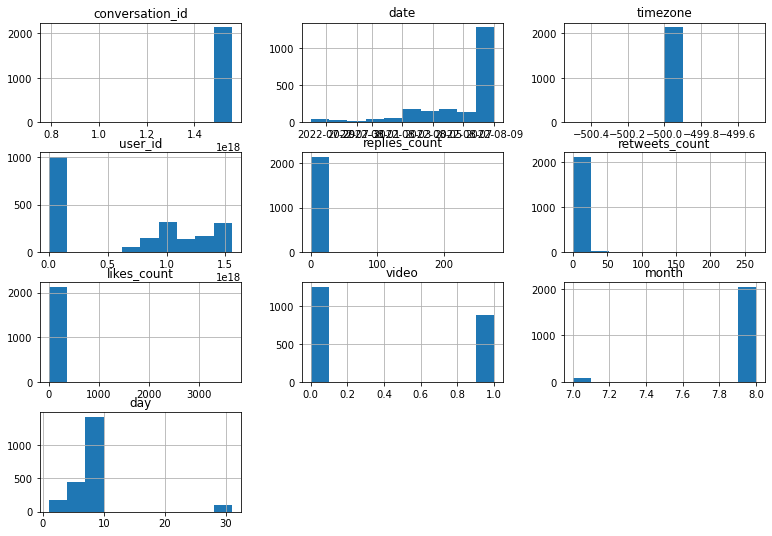

In [16]:
# Non-categorical data
df.hist(bins = 10)
plt.show()

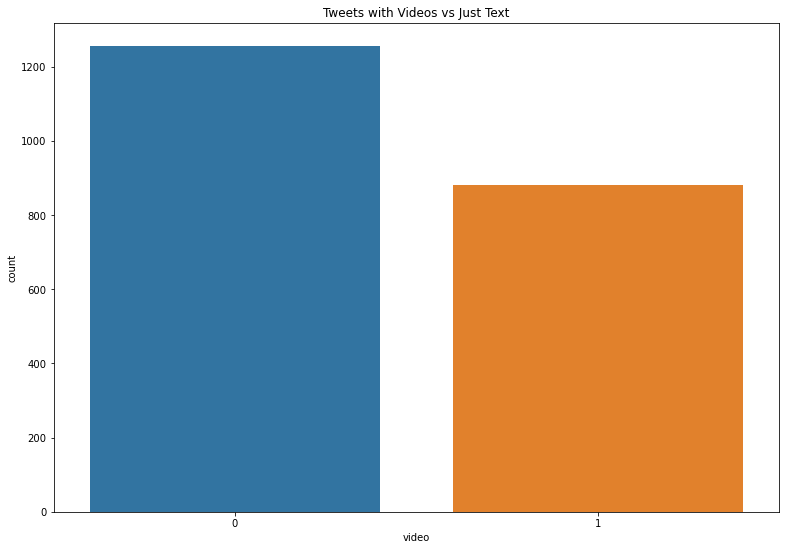

In [17]:
# Tweets with videos
sns.countplot('video', data = df)
plt.title('Tweets with Videos vs Just Text')
plt.show()

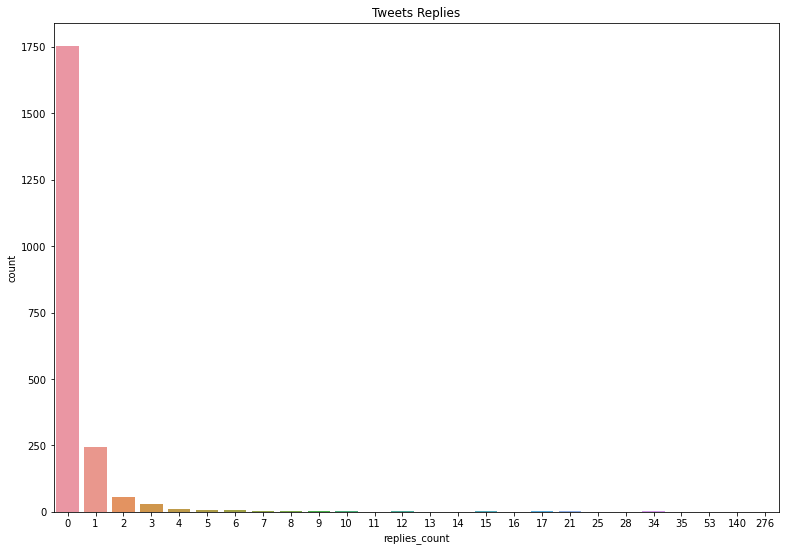

In [18]:
# Tweets with videos
sns.countplot('replies_count', data = df)
plt.title('Tweets Replies')
plt.show()

In [19]:
# Conventionally, more replies imply topic of interest
df.replies_count.value_counts()

0      1753
1       245
2        55
3        29
4        10
5         7
6         6
8         4
15        3
12        3
9         3
7         2
34        2
17        2
10        2
21        2
25        1
14        1
140       1
276       1
11        1
53        1
16        1
35        1
28        1
13        1
Name: replies_count, dtype: int64

In [20]:
# Examine tweet with more than 10 replies
replies_over_10 = df[df.replies_count > 10]
replies_over_10

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
104,1557125084455870468,2022-08-09,17:02:04,-500,1024676447850582017,smutoro,Stephen Mutoro,Anyone at the Homabay tallying centre? Kindly ...,en,[],[],['https://pbs.twimg.com/media/FZwFAyDWQAEobx-....,12,12,161,"['kenyadecides2022', 'kenyaelections2022']",https://twitter.com/smutoro/status/15571250844...,1,8,9
173,1557108767967383553,2022-08-09,15:57:14,-500,704572988,sankibz,Vote @William Samoei Ruto.,Congratulations Susan Kihika Nakuru county Gov...,tl,[],[],[],11,41,245,"['kenyadecides2022', 'kenyaelections2022', 'ke...",https://twitter.com/SanKibz/status/15571087679...,0,8,9
420,1557026040186273793,2022-08-09,10:28:30,-500,238098759,fromagehomme,Nic Cheeseman,Turnout update ... Don't assume low turnout n...,en,[],[],[],21,33,105,"['kenyaelections2022', 'kenya']",https://twitter.com/Fromagehomme/status/155702...,0,8,9
632,1556941754707869696,2022-08-09,04:53:35,-500,1106310289711120384,kilundeezy,Boniface,As we vote i would like to bring to your att...,en,[],[],['https://pbs.twimg.com/media/FZtVjDiXEAIEd4V....,12,41,54,"['kenyadecides', 'kenyadecides2022']",https://twitter.com/kilundeezy/status/15569417...,1,8,9
677,1556926943492194304,2022-08-09,03:54:44,-500,1060589563,thisisbett,Enock Bett,I can't wait for: BREAKING NEWS: WILLIAM RUTO...,en,[],[],[],140,177,1984,[],https://twitter.com/ThisIsBett/status/15569269...,0,8,9
741,1556911128223023106,2022-08-09,02:51:53,-500,742143,bbcworld,BBC News (World),Kenya elections 2022: Raila Odinga and William...,en,[],['https://bbc.in/3djbcHa'],[],21,48,300,[],https://twitter.com/BBCWorld/status/1556911128...,0,8,9
850,1556868517034708992,2022-08-09,00:02:34,-500,865669726210535424,its_ombati,Paul Ombati,Kenya 🇰🇪 General Elections 2022. IEBC Opened...,en,[],[],['https://pbs.twimg.com/media/FZsbqkFWAAAqu-H....,14,23,27,"['justvoted', 'kenyadecides2022', 'kenyaelecti...",https://twitter.com/Its_Ombati/status/15568685...,1,8,9
1029,1556678974369140737,2022-08-08,11:29:23,-500,1181575242,usambkenya,U.S. Ambassador Meg Whitman,Great to meet members of the NDI-IRI Internati...,en,[],[],['https://pbs.twimg.com/media/FZpvRFYWQAYtJDw....,15,23,217,['kenyaelections2022'],https://twitter.com/USAmbKenya/status/15566789...,1,8,8
1197,1556583498013712385,2022-08-08,05:10:00,-500,20116209,kimberleyeleo,Kimberley Leonard,#KOT #KenyaDecides #kenyaelections2022 #Kenyan...,en,"[{'screen_name': 'williamsruto', 'name': 'will...",['https://news.sky.com/video/the-front-runners...,[],25,42,346,"['kot', 'kenyadecides', 'kenyaelections2022', ...",https://twitter.com/KimberleyeLeo/status/15565...,0,8,8
1280,1556519582630039552,2022-08-08,00:56:01,-500,927151099,keequitybank,Equity Bank Kenya,"Dear Member, Please note all our branches cou...",en,[],[],[],17,4,36,['godigitalbanking'],https://twitter.com/KeEquityBank/status/155651...,1,8,8


In [21]:
# Tweet
print(replies_over_10.tweet.unique())

['Anyone at the Homabay tallying centre? Kindly verify the details about reports that Dr Evans Kidero could be leading the count against his rival, Gladys Wanga. Please help share authentic information and make Twitter platform even better #KenyaDecides2022 #kenyaelections2022  https://t.co/0TIq2WWeIF'
 'Congratulations Susan Kihika Nakuru county Governor Elect  Kimani Wamatangi- Governor Kiambu Elect #KenyaDecides2022 #kenyaelections2022 #KenyaElections'
 "Turnout update ...  Don't assume low turnout necessarily hurts one candidate more than the other ...  Lower turnout in Central will hurt Ruto's chances for sure  But we are hearing of turnout under 65% in large parts of Kisumu which is v bad for Raila  #kenyaelections2022 #Kenya"
 'As we vote  i would like  to bring to your attention the role that Mobile Network Operators in Kenya are tasked with in the 2022 general elections.  #KenyaDecides #KenyaDecides2022  https://t.co/pPFmBoZBBx'
 "I can't wait for:  BREAKING NEWS: WILLIAM RUTO

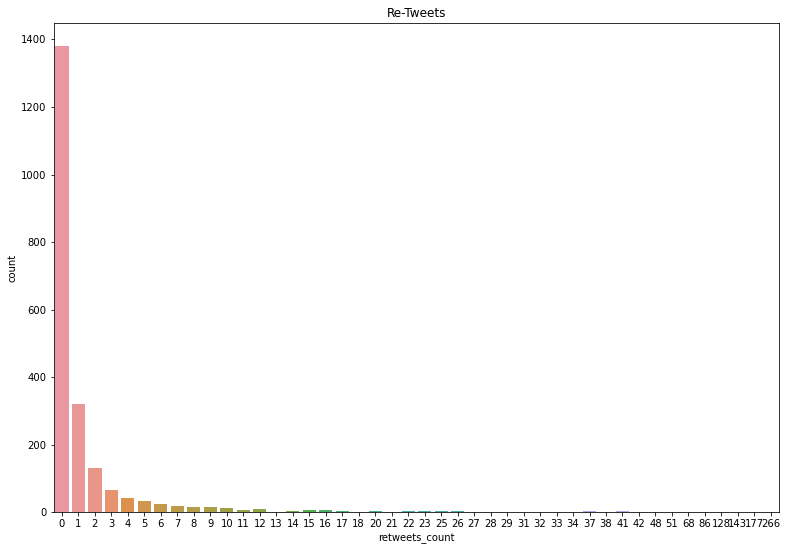

In [22]:
# Tweets with videos
sns.countplot('retweets_count', data = df)
plt.title('Re-Tweets')
plt.show()

In [23]:
# Like replies, examine re-tweets
df.retweets_count.value_counts()

0      1379
1       320
2       131
3        67
4        42
5        33
6        24
7        19
9        15
8        15
10       13
12        9
15        7
16        6
11        6
14        5
20        4
25        3
23        3
26        3
37        3
22        3
17        3
41        3
18        2
13        2
128       1
68        1
38        1
86        1
34        1
266       1
143       1
48        1
27        1
31        1
42        1
21        1
29        1
177       1
33        1
51        1
28        1
32        1
Name: retweets_count, dtype: int64

In [24]:
# Re-tweets Greater than 100 
retweet_over_10_times = df[df.retweets_count > 10 ]
retweet_over_10_times

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
104,1557125084455870468,2022-08-09,17:02:04,-500,1024676447850582017,smutoro,Stephen Mutoro,Anyone at the Homabay tallying centre? Kindly ...,en,[],[],['https://pbs.twimg.com/media/FZwFAyDWQAEobx-....,12,12,161,"['kenyadecides2022', 'kenyaelections2022']",https://twitter.com/smutoro/status/15571250844...,1,8,9
109,1557123118006767629,2022-08-09,16:54:15,-500,961175971448664065,peraton_senior,Perato N_Senior*️⃣,Confirmed from over 60% of Form 34A . So far i...,en,[],[],[],1,15,138,"['kenyaelections2022', 'kenyadecides2022', 'ke...",https://twitter.com/PeratoN_Senior/status/1557...,0,8,9
173,1557108767967383553,2022-08-09,15:57:14,-500,704572988,sankibz,Vote @William Samoei Ruto.,Congratulations Susan Kihika Nakuru county Gov...,tl,[],[],[],11,41,245,"['kenyadecides2022', 'kenyaelections2022', 'ke...",https://twitter.com/SanKibz/status/15571087679...,0,8,9
178,1557106954505420802,2022-08-09,15:50:02,-500,961175971448664065,peraton_senior,Perato N_Senior*️⃣,The first son of Dynasties is home. Baringo Co...,en,[],[],['https://pbs.twimg.com/media/FZvzQeAXwAAu6pD....,1,14,74,"['kenyadecides2022', 'kenyaelections', 'kenyae...",https://twitter.com/PeratoN_Senior/status/1557...,1,8,9
201,1557098634881146880,2022-08-09,15:16:58,-500,50242372,iamrapcha,Rapcha The Sayantist,The 2022 Kenyan presidential elections turned ...,en,[],[],[],3,28,57,[],https://twitter.com/IAMRAPCHA/status/155709863...,0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1554083284392759296,2022-08-01,07:35:03,-500,289259558,brianosweta,Brian Osweta,Who is in the race to run Kenya? Here is an i...,en,"[{'screen_name': 'bbcafrica', 'name': 'bbc new...",['https://www.bbc.com/news/world-africa-620404...,['https://pbs.twimg.com/media/FZE01hqXoAEvu3s....,0,12,39,[],https://twitter.com/BrianOsweta/status/1554083...,1,8,1
2060,1553630095499317249,2022-07-31,01:34:14,-500,2616962058,profkagwanja,Peter Kagwanja,Kenya’s 2022 presidential elections becoming a...,en,[],[],[],4,25,31,[],https://twitter.com/profkagwanja/status/155363...,1,7,31
2092,1553269079162716160,2022-07-30,01:39:41,-500,1562505374,irck_info,Inter-Religious Council of Kenya(IRCK),.@irck_info COUNTDOWN to the 2022 General Elec...,en,"[{'screen_name': 'irck_info', 'name': 'inter-r...",[],['https://pbs.twimg.com/media/FY5P_Y_XgAABpby....,1,13,21,['letpeacewin'],https://twitter.com/irck_info/status/155326907...,1,7,30
2105,1553033463133081602,2022-07-29,10:03:26,-500,1531253586927263746,bakhita_esther,Bakhita Esther,The hustler nation tuko ready to vote for Ruto...,tl,[],[],['https://pbs.twimg.com/media/FY17stRXwAIkclu....,34,86,1025,"['kenya7s', 'rutothe5th', 'enoughisenough', 'k...",https://twitter.com/bakhita_esther/status/1553...,1,7,29


In [25]:
# Message
retweet_over_10_times.tweet

104     Anyone at the Homabay tallying centre? Kindly ...
109     Confirmed from over 60% of Form 34A . So far i...
173     Congratulations Susan Kihika Nakuru county Gov...
178     The first son of Dynasties is home. Baringo Co...
201     The 2022 Kenyan presidential elections turned ...
                              ...                        
2019    Who is in the race to run Kenya?  Here is an i...
2060    Kenya’s 2022 presidential elections becoming a...
2092    .@irck_info COUNTDOWN to the 2022 General Elec...
2105    The hustler nation tuko ready to vote for Ruto...
2132    Kenya abolished car grants and sitting allowan...
Name: tweet, Length: 80, dtype: object

### Bivariate Features

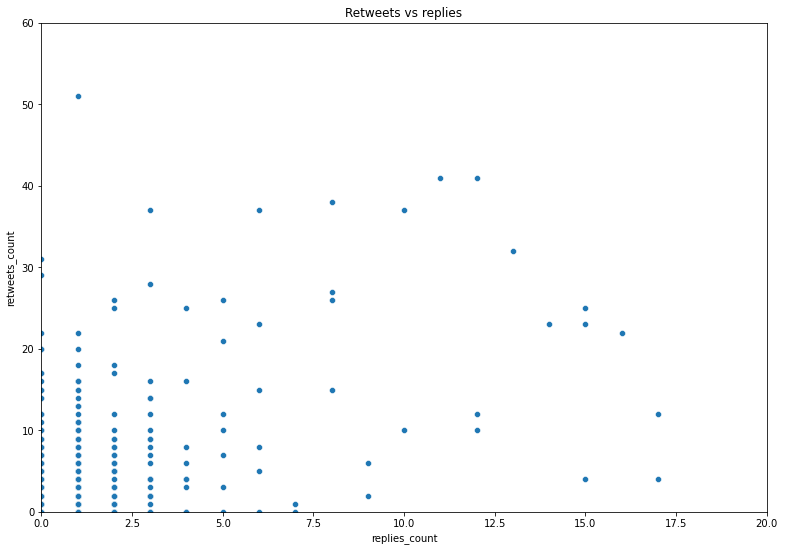

In [26]:
# Retweets with videos

sns.scatterplot(data = df, y = 'retweets_count', x = 'replies_count')
plt.xlim(0, 20)
plt.ylim(0, 60)
plt.title('Retweets vs replies')


None

### Multi-variate Features

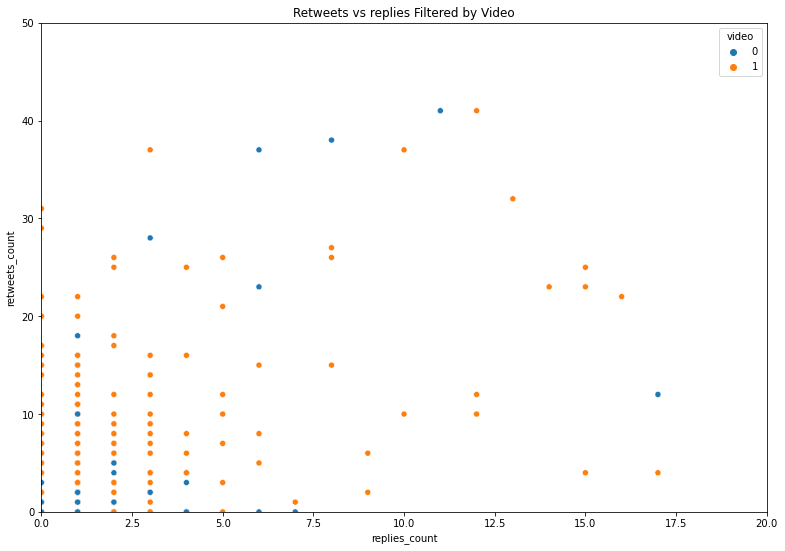

In [27]:
# Retweets vs replies with videos

sns.scatterplot(data = df, y = 'retweets_count', x = 'replies_count', hue = 'video')
plt.xlim(0, 20)
plt.ylim(0, 50)
plt.title('Retweets vs replies Filtered by Video')

None

For purpose of time, this mini-project will limit visual exploration for future discoveries

### Tokenize Words

Break words and any punctuation left over into discrete units.

In [28]:
def tokenize_tweets(text):
    
    tokenizer = ToktokTokenizer()
    
    return tokenizer.tokenize(text, return_str = True)
    
df['tweet'] = df['tweet'].apply (lambda x: tokenize_tweets(x.lower()))

### Remove Stopwords

Stop words dont add any value to our analysis, hence no need/ Stipped.

In [29]:
stop_words = stopwords.words('english')


df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Stemming/ Lemmatize

In [30]:
def stemmer(text):
    
    ps = PorterStemmer()
    
    return ps.stem(text)

def lemmatize(text):
    
    wnl = WordNetLemmatizer()
    
    return wnl.lemmatize(text)

df['tweet'] = df['tweet'].apply(lambda x: stemmer(x))
df['tweet'] = df['tweet'].apply(lambda x: lemmatize(x))

### Word Count

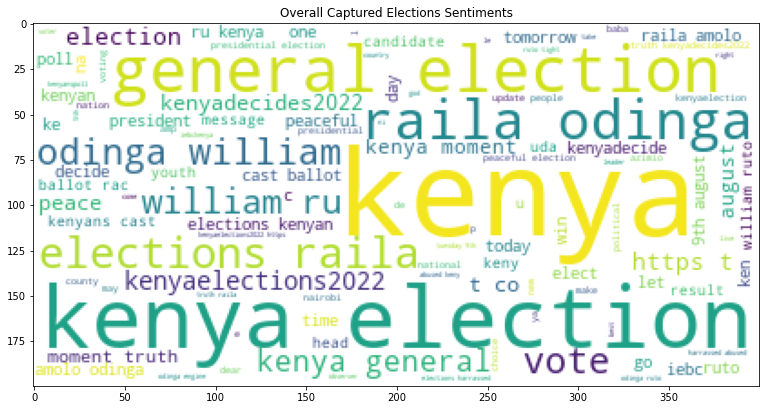

In [31]:
# Convert tweets to string
tweets_list = df.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Overall Captured Elections Sentiments')
plt.show()

### Word Cloud with 10+ Replies (Can be infered as most popular sentiments)

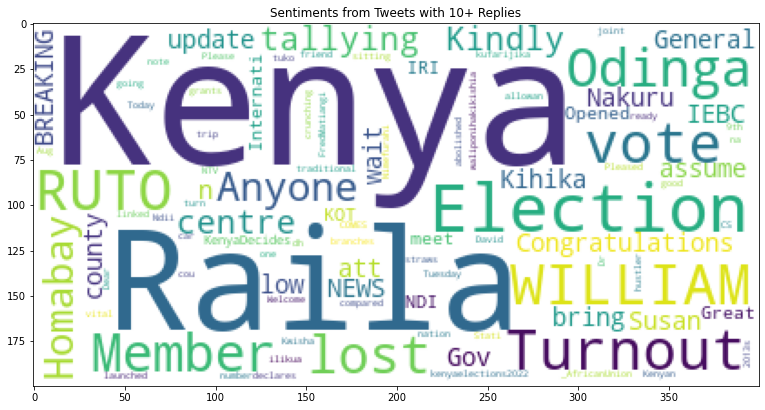

In [32]:
# Convert tweets to string
tweets_list = replies_over_10.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Sentiments from Tweets with 10+ Replies')
plt.show()

### Tweets with Retweets over 10 Times

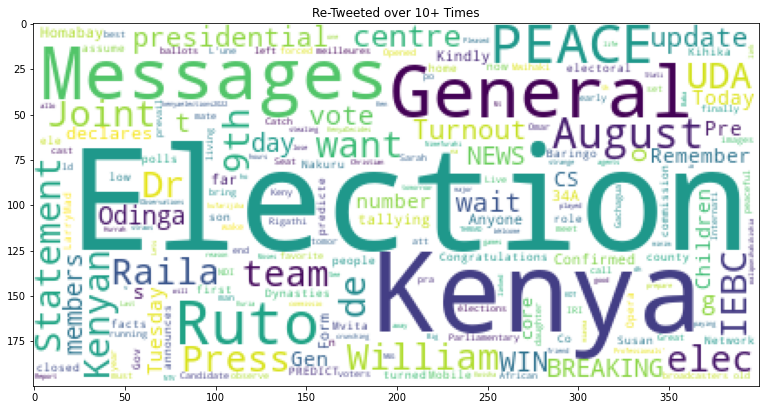

In [33]:
# Convert tweets to string
tweets_list = retweet_over_10_times.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Re-Tweeted over 10+ Times')
plt.show()

# Week-by-Week Tweet Analysis 

## Project on-going and current as of July 27, 2022
- Improvements:
    - Implement time series analysis
    - Bigrams
    - Get more data greater than a week
    - Get insight on candidates (Search frequency of candidates)